In [1]:
!pip install yfinance
!pip install pandas-datareader
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=ad3ac8c05c13feac49fc72d75b1fed336fa30a188d359e01719f55c99dfcb539
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed
트레이닝 데이터: 2457
테스트 데이터: 188


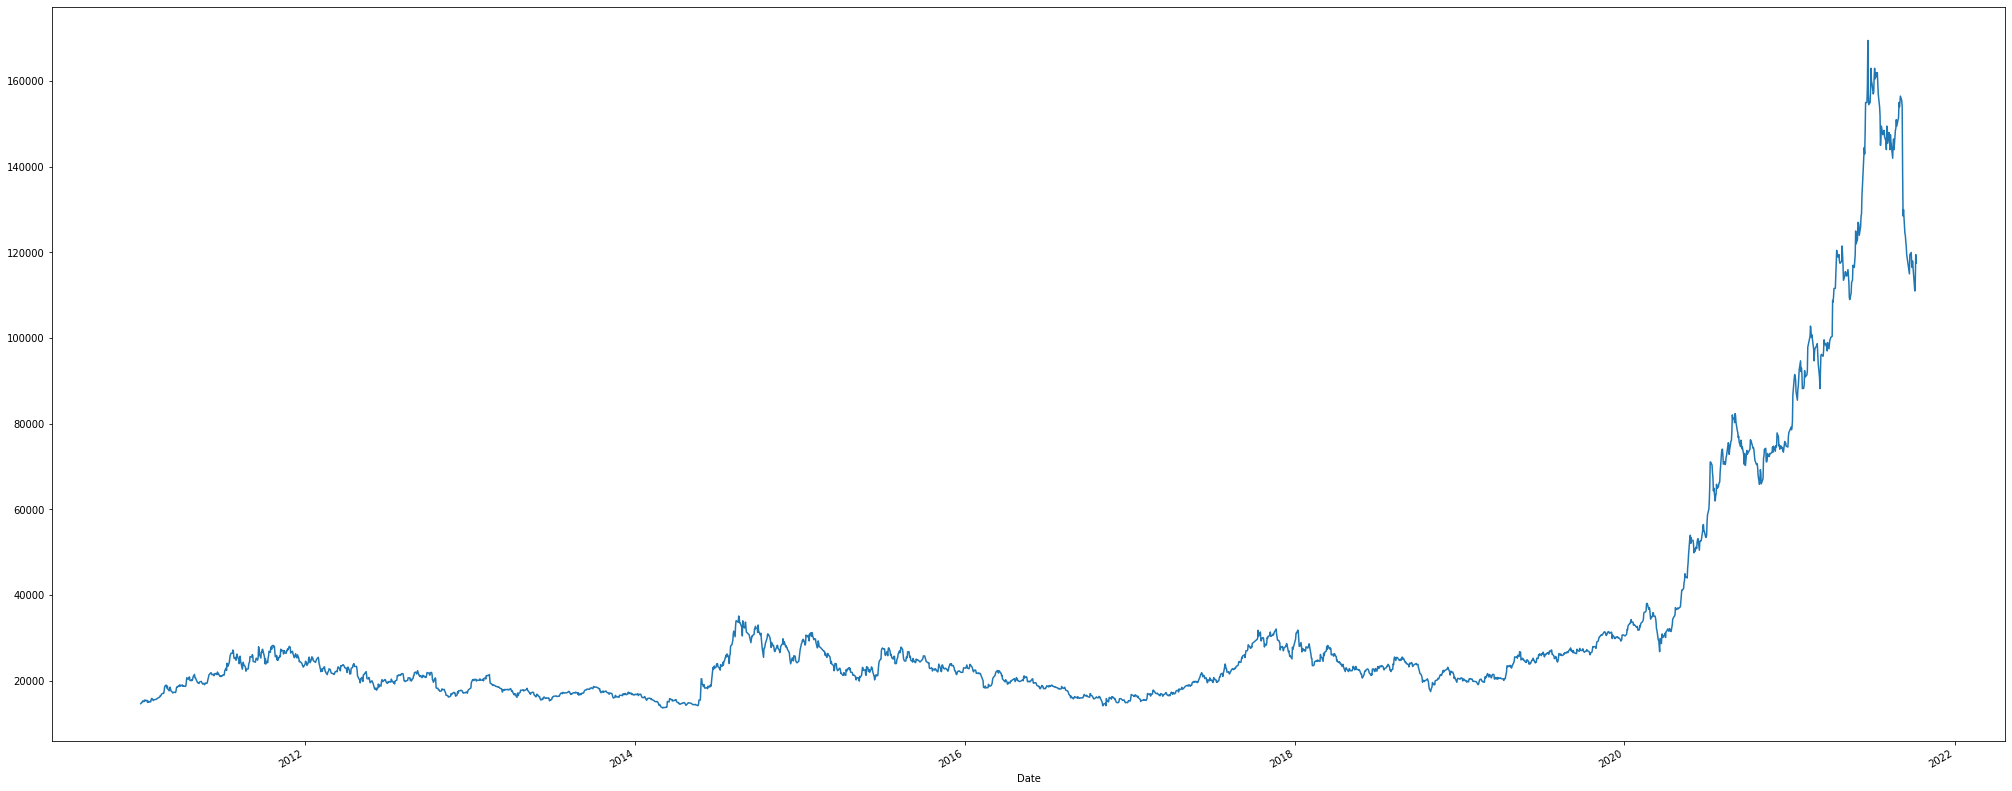

In [129]:
submission = pdr.get_data_yahoo('035720.KS','2011-01-01','2021-12-31')
all_data = submission[['Adj Close', 'Open', 'High','Low',"Close","Volume"]].round(2)
all_data.head(10)
print("트레이닝 데이터: "+str(all_data[:'2020'].shape[0]))
print("테스트 데이터: "+str(all_data['2021':].shape[0]))
all_data['Adj Close'].plot()

In [130]:
all_data

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2011-01-03,14644.76,15500.0,15500.0,15220.0,15360.0,336655
2011-01-04,14797.31,15360.0,15880.0,15360.0,15520.0,387070
2011-01-05,14873.58,15560.0,15700.0,15400.0,15600.0,276975
2011-01-06,14911.72,15760.0,15840.0,15520.0,15640.0,221745
2011-01-07,15274.02,15720.0,16100.0,15580.0,16020.0,658820
...,...,...,...,...,...,...
2021-10-01,116500.00,118000.0,120000.0,116000.0,116500.0,2329103
2021-10-05,111000.00,114500.0,116000.0,110500.0,111000.0,4885065
2021-10-06,113000.00,112500.0,116000.0,112000.0,113000.0,4610915


##시각화


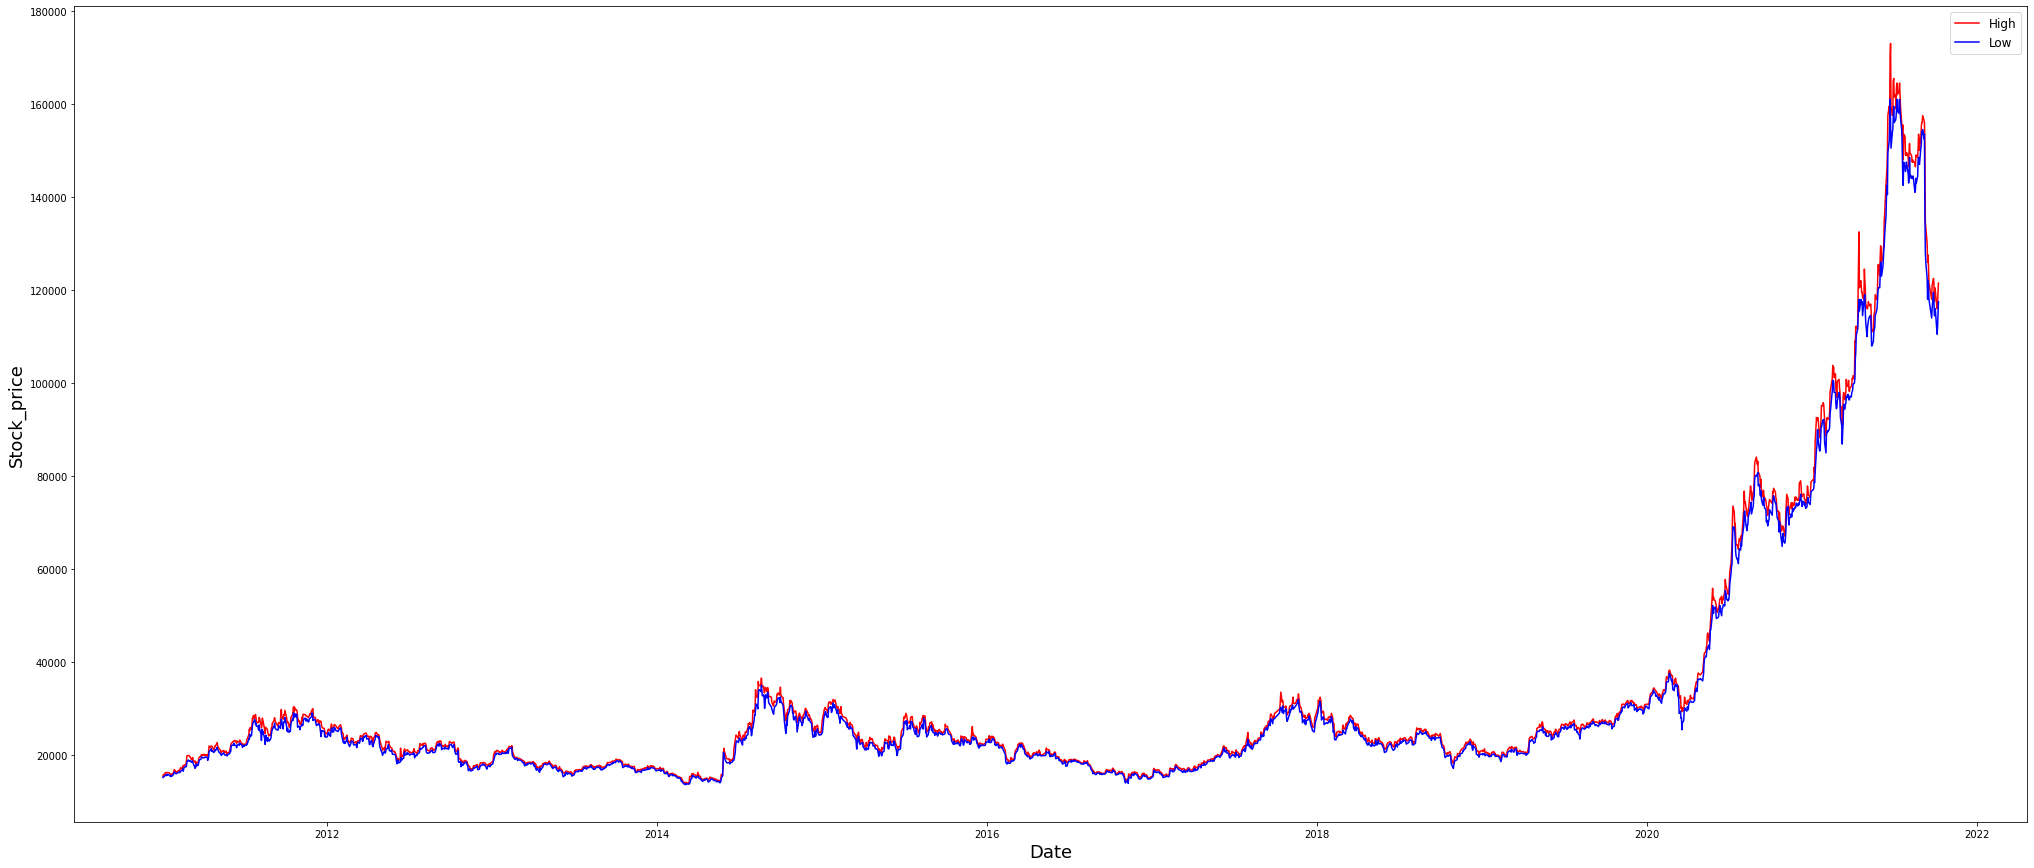

In [131]:
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock_price', fontsize=18)
plt.plot(submission.High, 'red') # 최고값 시각화
plt.plot(submission.Low, 'blue') # 최저값 시각화
from pylab import rcParams
from pylab import legend
legend(['High', 'Low'], loc='best', fontsize= 12)
rcParams['figure.figsize'] = 35,15
plt.show()

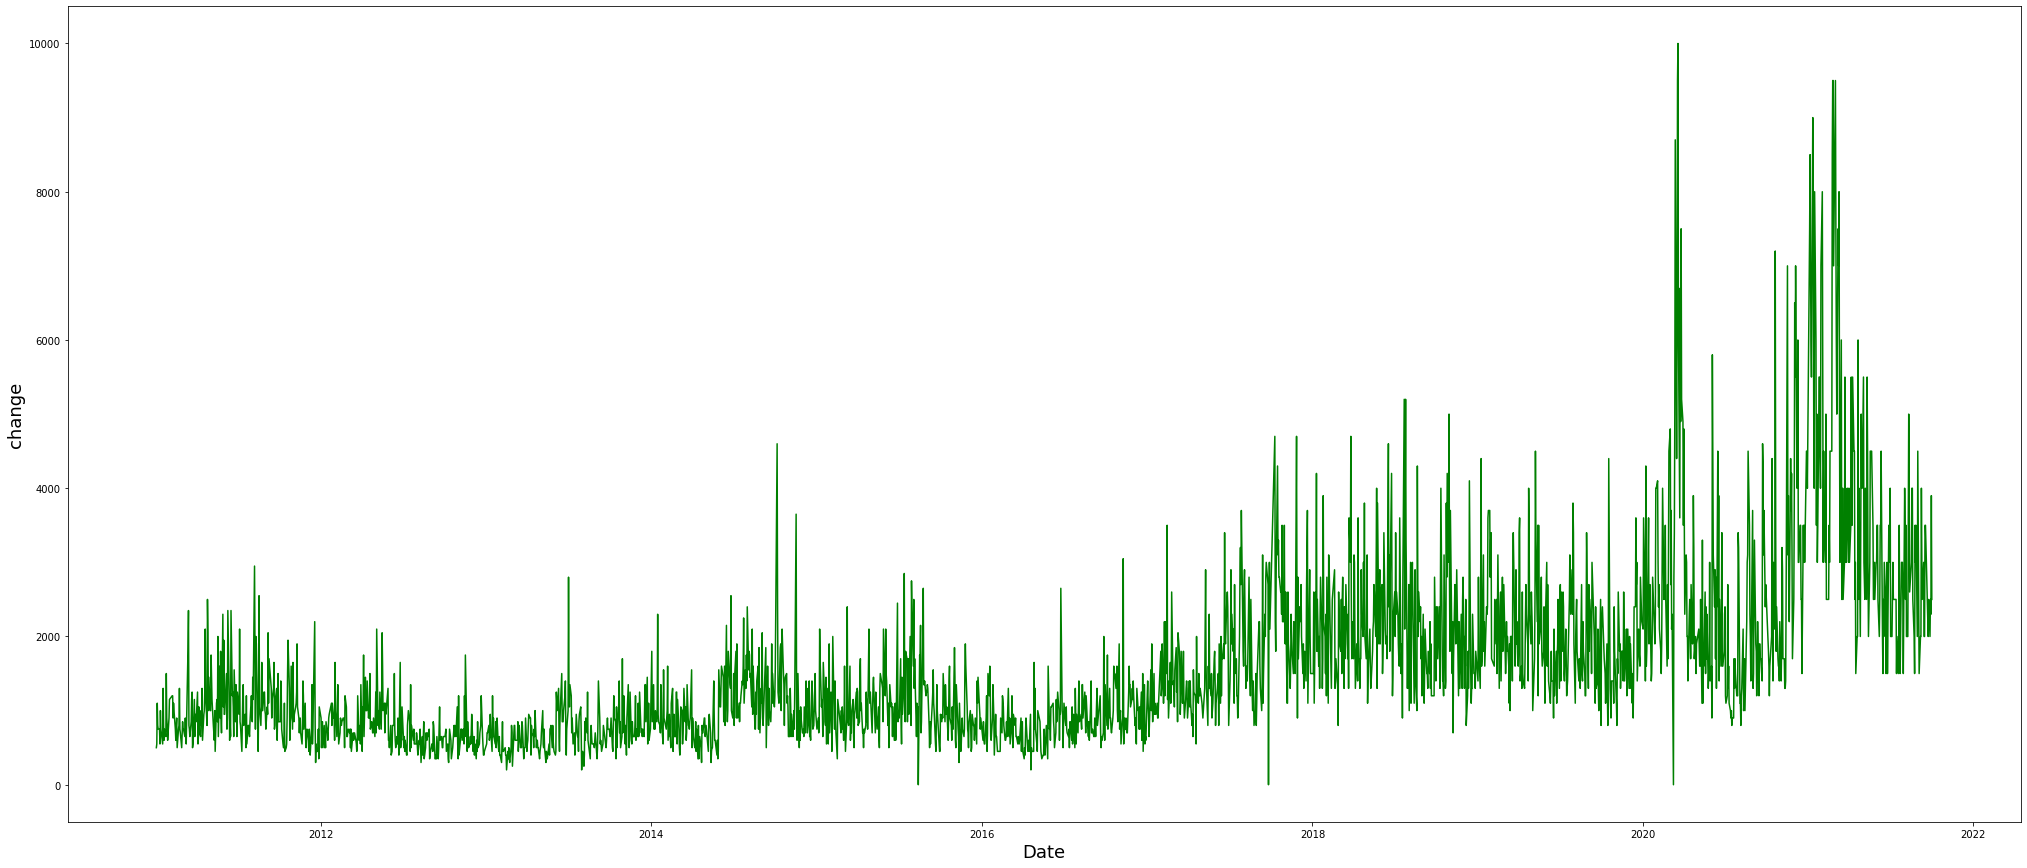

In [ ]:
change = submission.High - submission.Low # (최고값 - 최저값) 시각화
plt.xlabel('Date', fontsize=18)
plt.ylabel('change', fontsize=18)
plt.plot(change, 'green')

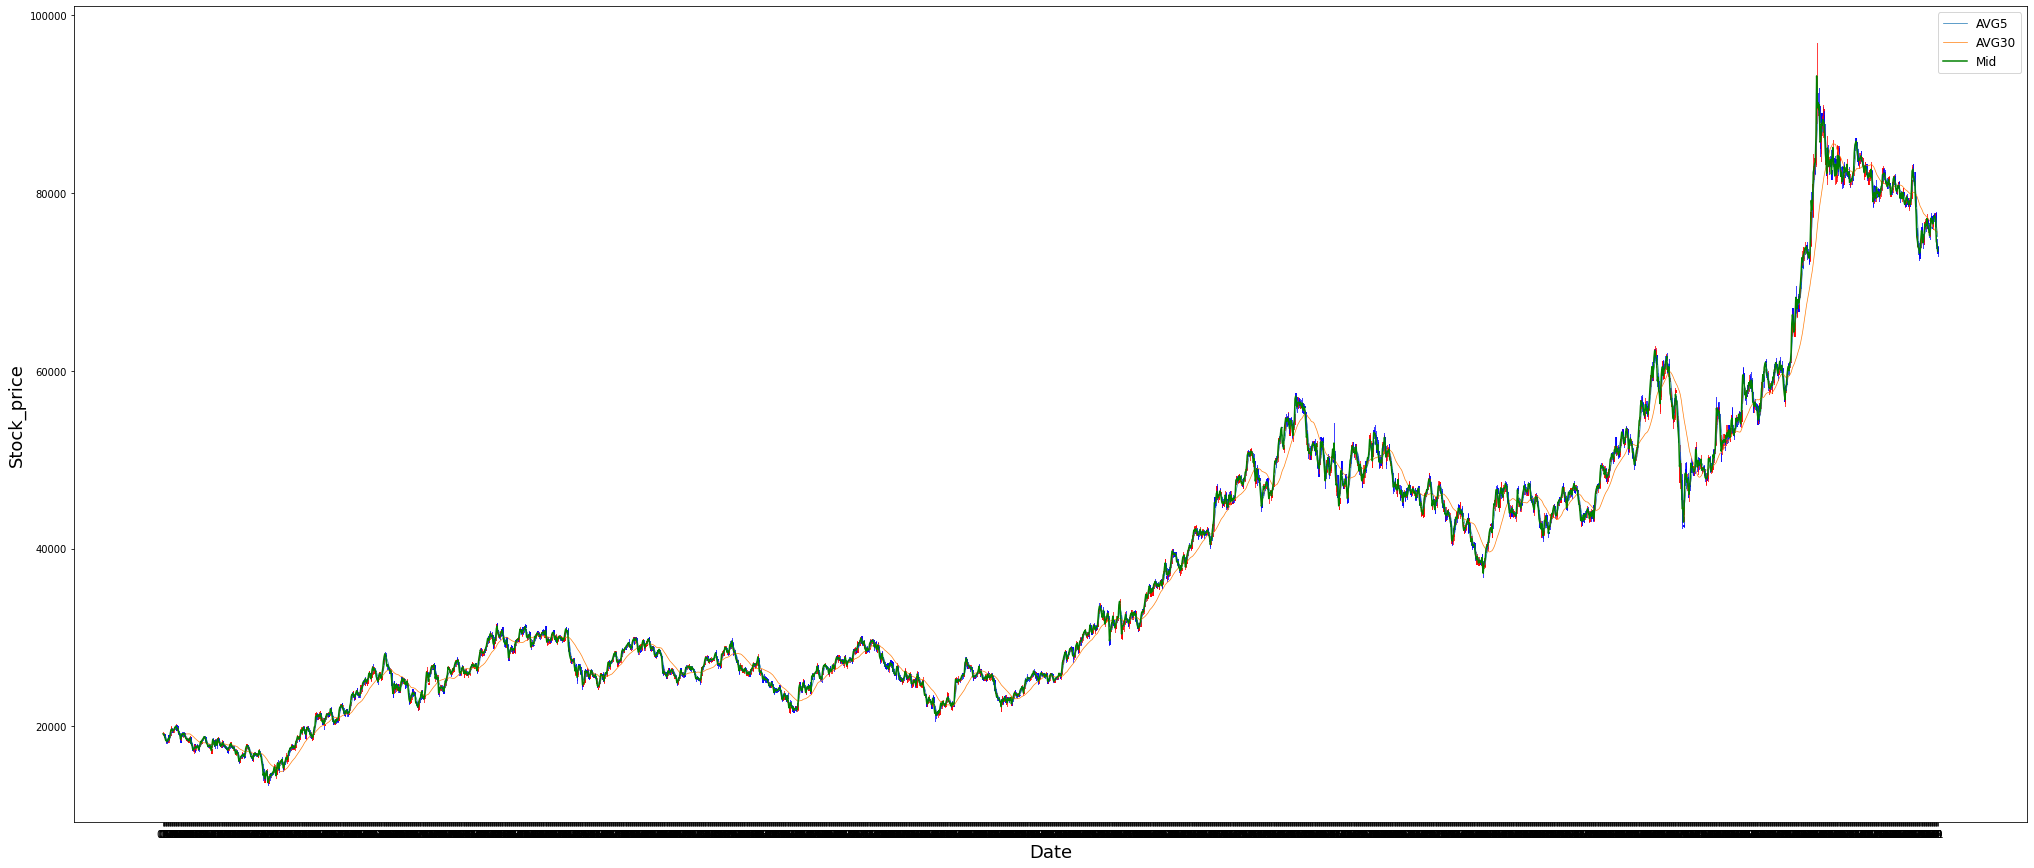

In [ ]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
!pip install mpl_finance
import mpl_finance
import matplotlib.ticker as ticker
from pylab import rcParams
from pylab import legend

fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111)

day_list = range(len(submission))
name_list = []
for day in submission.index:
    name_list.append(day.strftime('%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

#캔들차트
mpl_finance.candlestick2_ohlc(ax, submission['Open'], submission['High'], submission['Low'], submission['Close'], width=0.5, colorup='r', colordown='b')

#이동평균선 5일, 30일
ax.plot(day_list, submission['Close'].rolling(window=5).mean(), label="평균5일",linewidth=0.7)
ax.plot(day_list, submission['Close'].rolling(window=30).mean(), label="평균30일",linewidth=0.7)
#ax.plot(day_list, submission['Close'].rolling(window=60).mean(), label="평균60일",linewidth=0.7)
#ax.plot(day_list, submission['Close'].rolling(window=120).mean(), label="평균120일",linewidth=0.7)

#최고가와 최저가의 중간값
ax.plot(day_list, (submission['High'] + submission['Low'])/2, 'green')
legend(['AVG5', 'AVG30' , 'Mid'], loc='best', fontsize= 12)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock_price', fontsize=18)
plt.show()

In [ ]:
sum_5 = []
sum_10 = []
sum_20 = []
percent_5 = [0]
percent_10 = [0]
percent_20 = [0]
pt_5 = []
pt_10 = []
pt_20 = []
sum = 0

for i in range(int(len(submission['Close'])/5)): # sum의 5일을 합쳐서 sum_5에 입력
    sum = submission['Close'][5*i] + submission['Close'][5*i+1] + submission['Close'][5*i+2] + submission['Close'][5*i+3] + submission['Close'][5*i+4]
    sum_5.append(sum/5)
    sum = 0
for n in range(len(sum_5)-1):
    percent_5.append((sum_5[n+1] - sum_5[n]) / sum_5[n])

for i in range(int(len(submission['Close'])/10)): # sum의 10일을 합쳐서 sum_10에 입력
    sum = (submission['Close'][10*i] + submission['Close'][10*i+1] + submission['Close'][10*i+2] + submission['Close'][10*i+3] + submission['Close'][10*i+4]
        + submission['Close'][10*i+5] + submission['Close'][10*i+6] + submission['Close'][10*i+7] + submission['Close'][10*i+8] + submission['Close'][10*i+9])
    sum_10.append(sum/10)
    sum = 0
for n in range(len(sum_10)-1):
    percent_10.append((sum_10[n+1] - sum_10[n]) / sum_10[n])

for i in range(int(len(submission['Close'])/20)): # sum의 20일을 합쳐서 sum_20에 입력
    sum = (submission['Close'][20*i] + submission['Close'][20*i+1] + submission['Close'][20*i+2] + submission['Close'][20*i+3] + submission['Close'][20*i+4]
        + submission['Close'][20*i+5] + submission['Close'][20*i+6] + submission['Close'][20*i+7] + submission['Close'][20*i+8] + submission['Close'][20*i+9]
        + submission['Close'][20*i+10] + submission['Close'][20*i+11] + submission['Close'][20*i+12] + submission['Close'][20*i+13] + submission['Close'][20*i+14]
        + submission['Close'][20*i+15] + submission['Close'][20*i+16] + submission['Close'][20*i+17] + submission['Close'][20*i+18] + submission['Close'][20*i+19])
    sum_20.append(sum/20)
    sum = 0
for n in range(len(sum_20)-1):
    percent_20.append((sum_20[n+1] - sum_20[n]) / sum_20[n])

print(sum_5)
print(percent_5)
print("\n")
print(sum_10)
print(percent_10)
print("\n")
print(sum_20)
print(percent_20)
print("\n")

for i in range(len(sum_5)): #sum_5의 값을 5개중의 최대값으로 각각 나눈후 입력
    if i <= len(sum_5)-5:
        pt_5.append(sum_5[i] / max(sum_5[i], sum_5[i+1], sum_5[i+2], sum_5[i+3], sum_5[i+4]))
#pt_5 = pt_5 패턴분석 코드 자리 ex)52341
print(pt_5)

for i in range(len(sum_10)): #sum_10의 값을 5개중의 최대값으로 각각 나눈후 입력
    if i <= len(sum_10)-5:
        pt_10.append(sum_10[i]   / max(sum_10[i], sum_10[i+1], sum_10[i+2], sum_10[i+3], sum_10[i+4]))
print(pt_10)

for i in range(len(sum_20)): #sum_20의 값을 5개중의 최대값으로 각각 나눈후 입력
    if i <= len(sum_20)-5:
        pt_20.append(sum_20[i]   / max(sum_20[i], sum_20[i+1], sum_20[i+2], sum_20[i+3], sum_20[i+4]))
print(pt_20)

print(len(percent_5))
print(len(pt_5))

[18836.0, 18460.0, 19472.0, 19792.0, 19428.0, 18828.0, 18920.0, 18476.0, 18024.0, 17592.0, 17636.0, 18400.0, 18648.0, 17900.0, 17896.0, 18056.0, 18308.0, 17940.0, 17672.0, 17500.0, 17872.0, 17236.0, 16584.0, 16704.0, 17164.0, 17512.0, 16564.0, 16960.0, 16992.0, 15708.0, 14548.0, 14044.0, 14680.0, 15084.0, 15600.0, 15920.0, 16252.0, 17036.0, 17780.0, 18136.0, 18864.0, 19704.0, 19476.0, 19456.0, 19064.0, 20796.0, 21204.0, 20628.0, 21020.0, 21508.0, 20868.0, 20644.0, 21736.0, 22024.0, 21636.0, 21980.0, 23552.0, 23696.0, 23744.0, 24676.0, 25152.0, 25772.0, 26464.0, 25712.0, 25640.0, 26768.0, 27416.0, 26344.0, 24272.0, 24540.0, 24432.0, 25208.0, 24732.0, 23152.0, 23704.0, 22492.0, 23232.0, 23412.0, 25520.0, 25980.0, 26632.0, 25564.0, 24212.0, 24284.0, 25748.0, 26132.0, 26652.0, 27404.0, 26220.0, 26412.0, 26024.0, 26496.0, 26988.0, 26756.0, 28232.0, 28372.0, 29424.0, 30224.0, 29540.0, 30744.0, 30460.0, 29628.0, 28780.0, 28700.0, 28848.0, 29828.0, 30728.0, 30880.0, 30192.0, 29520.0, 29680.0, 

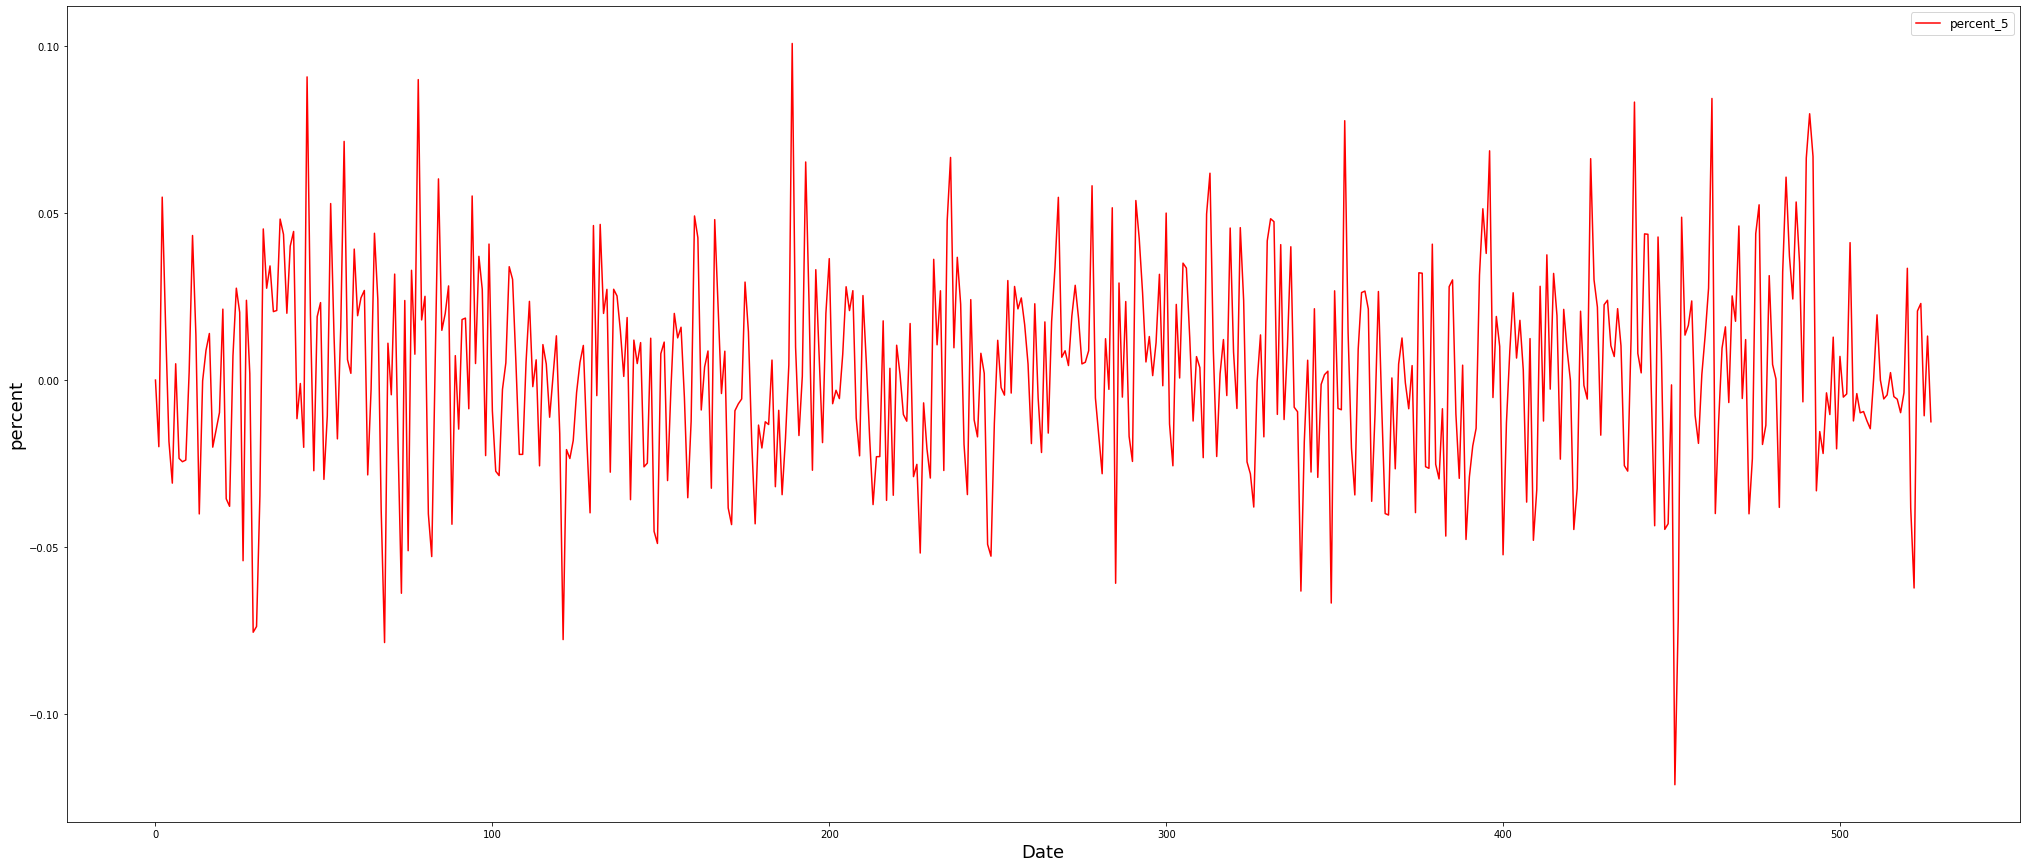

In [ ]:
# 패턴분석을 위한 시각화

plt.xlabel('Date', fontsize=18)
plt.ylabel('percent', fontsize=18)
plt.plot(percent_5, 'red')
from pylab import rcParams
from pylab import legend
legend(['percent_5'], loc='best', fontsize= 12)
rcParams['figure.figsize'] = 35,15
plt.show()

#10년치 5일기준

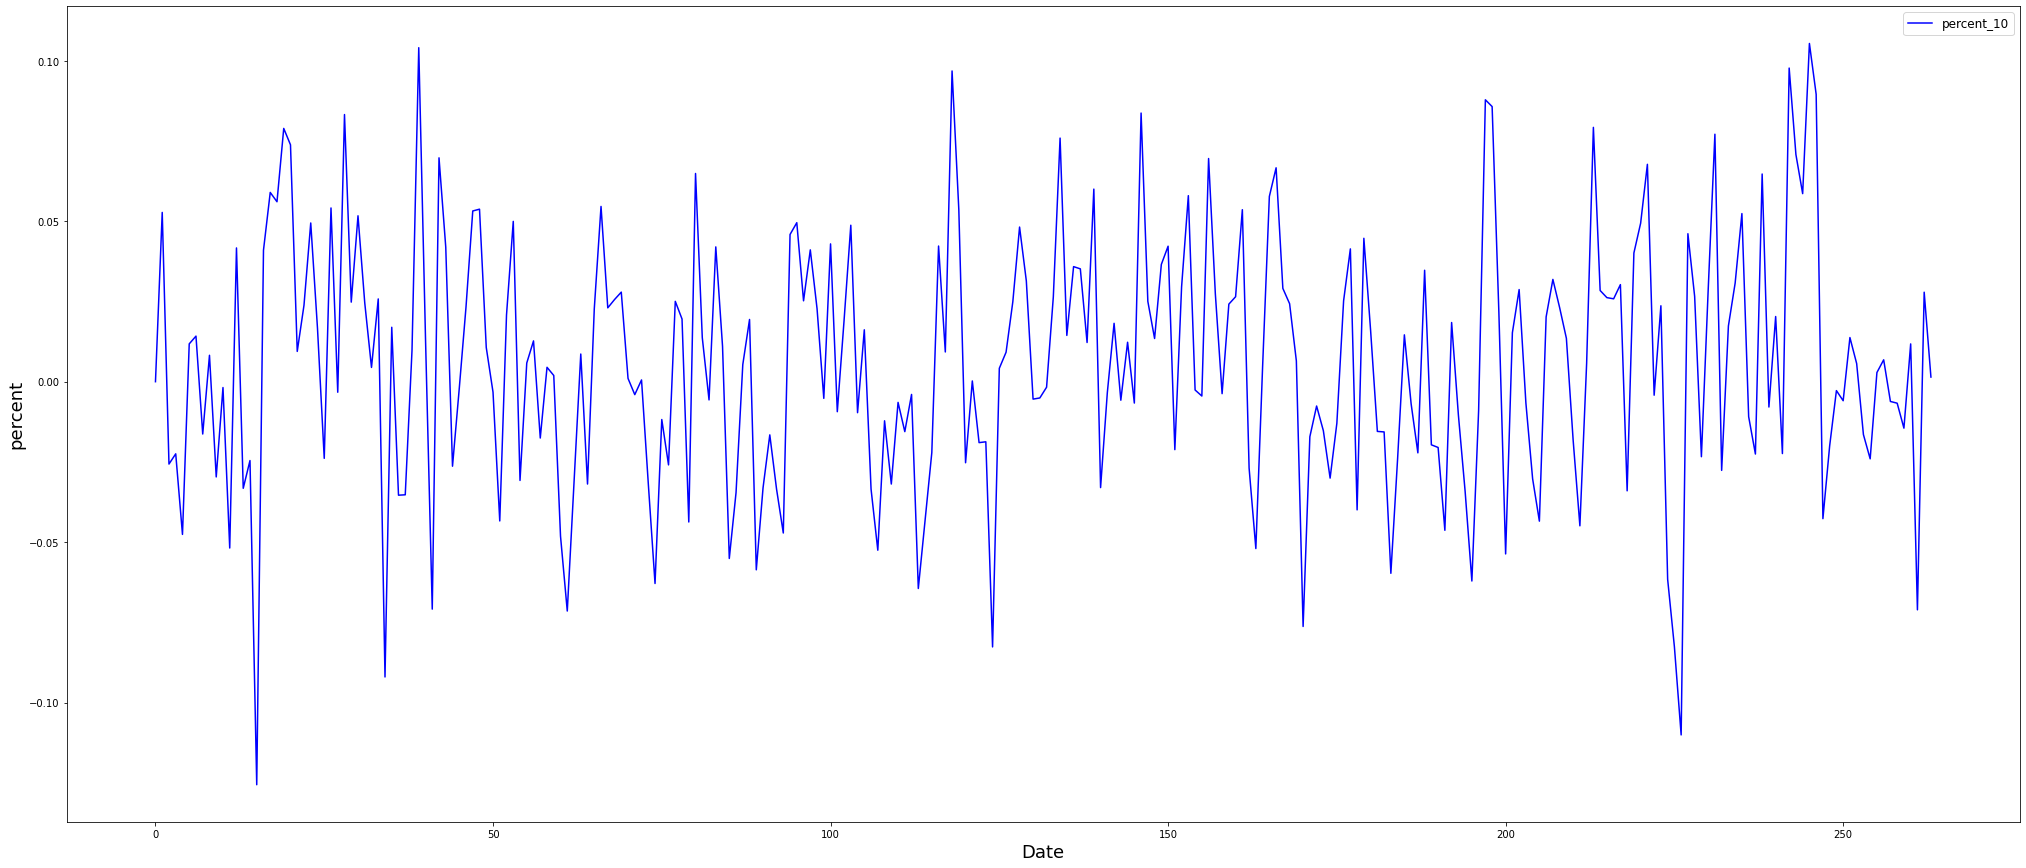

In [ ]:
# 패턴분석을 위한 시각화

plt.xlabel('Date', fontsize=18)
plt.ylabel('percent', fontsize=18)
plt.plot(percent_10, 'blue')
from pylab import rcParams
from pylab import legend
legend(['percent_10'], loc='best', fontsize= 12)
rcParams['figure.figsize'] = 35,15
plt.show()

#10년치 10일기준

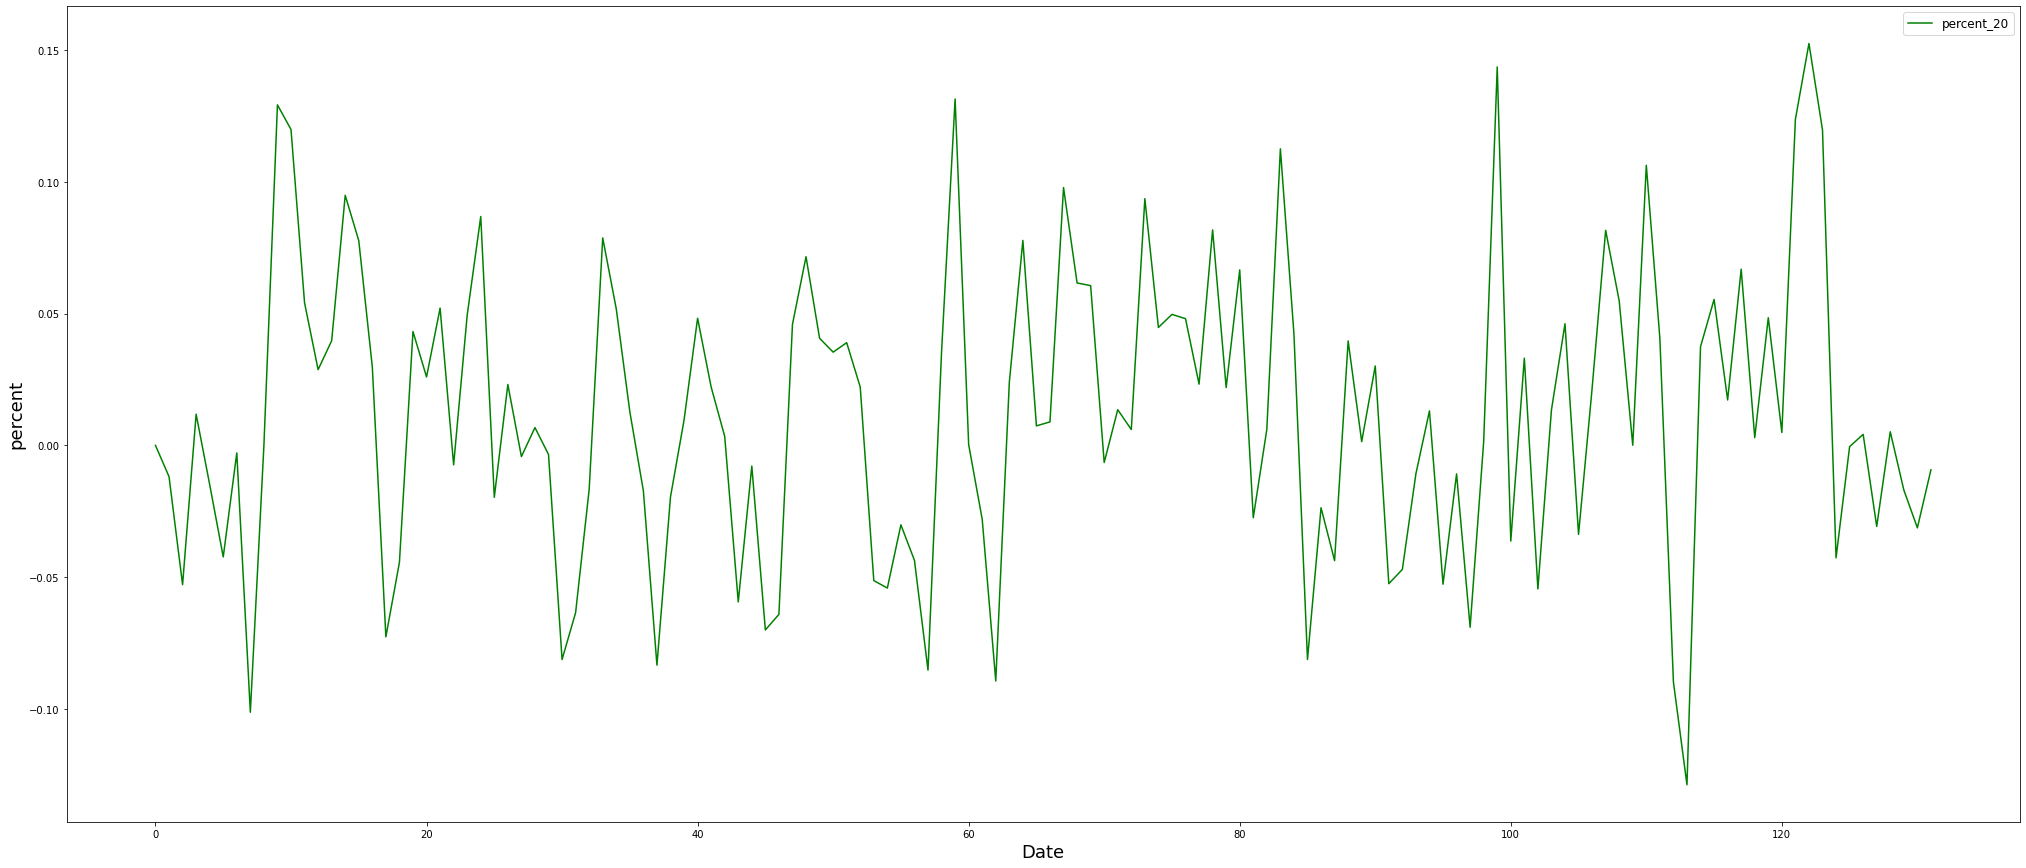

In [ ]:
# 패턴분석을 위한 시각화

plt.xlabel('Date', fontsize=18)
plt.ylabel('percent', fontsize=18)
plt.plot(percent_20, 'green')
from pylab import rcParams
from pylab import legend
legend(['percent_20'], loc='best', fontsize= 12)
rcParams['figure.figsize'] = 35,15
plt.show()

#10년치 20일기준

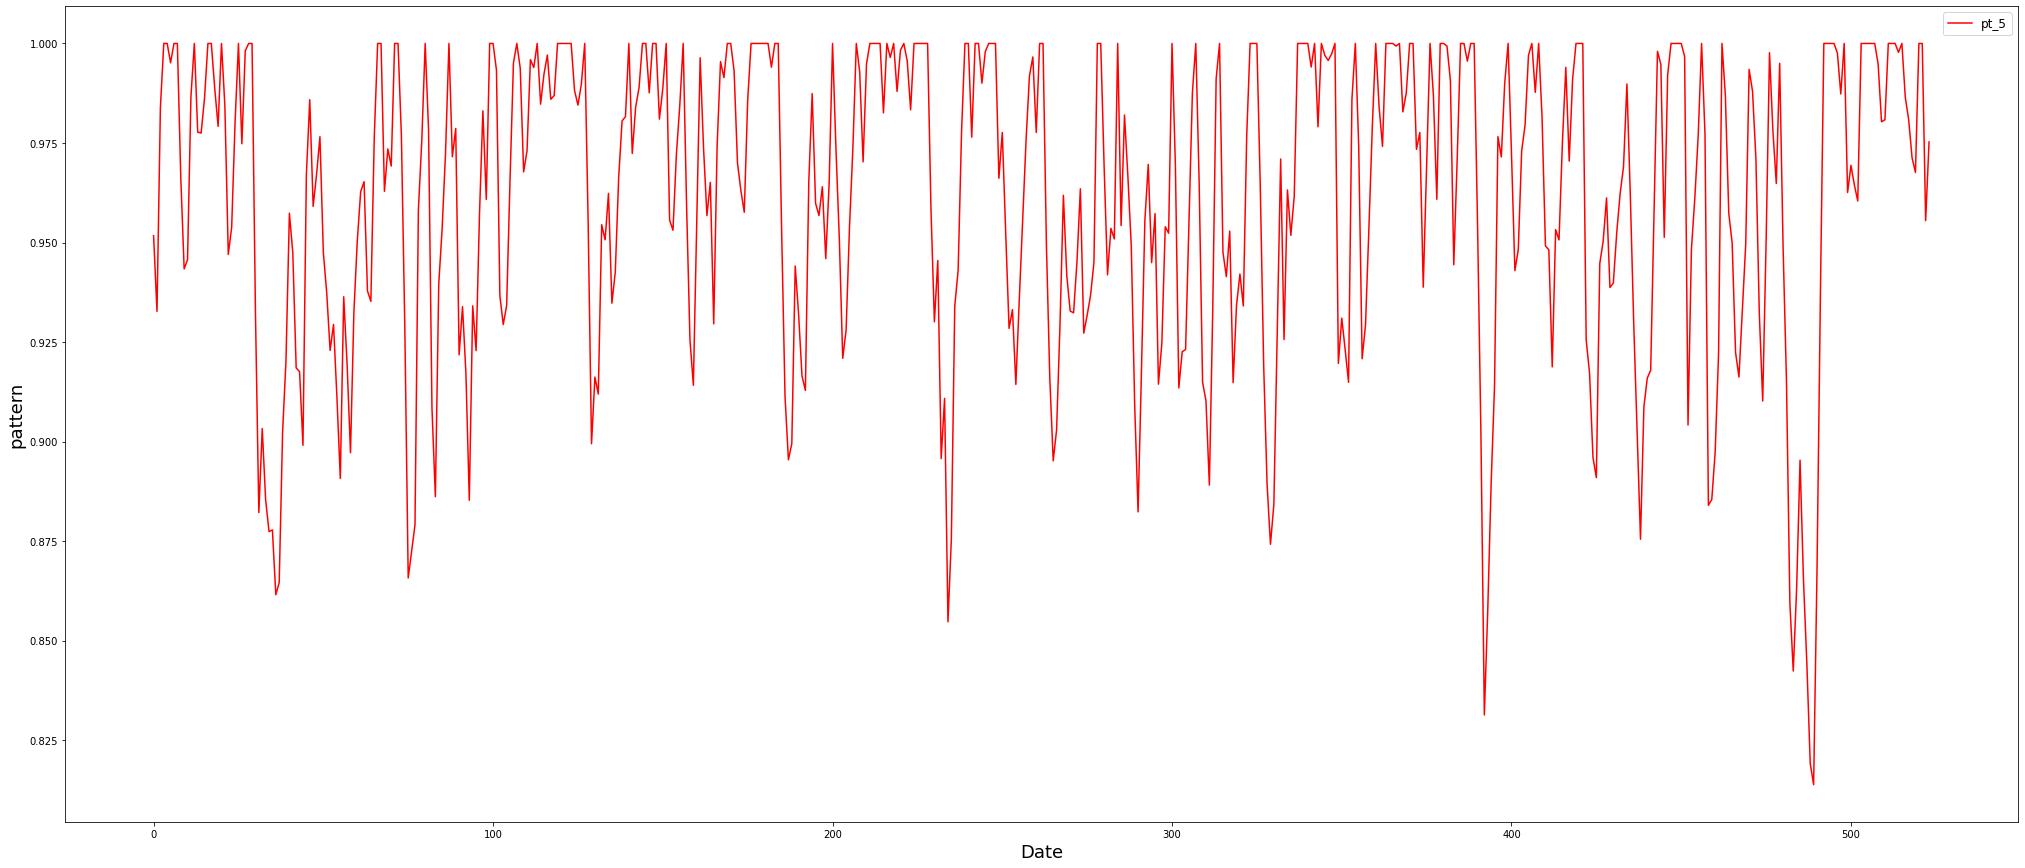

In [ ]:
# 패턴분석을 위한 시각화

plt.xlabel('Date', fontsize=18)
plt.ylabel('pattern', fontsize=18)
plt.plot(pt_5, 'red')
from pylab import rcParams
from pylab import legend
legend(['pt_5'], loc='best', fontsize= 12)
rcParams['figure.figsize'] = 35,15
plt.show()

#10년치

In [ ]:
# 교수님께서 말씀하신방법
# 데이터 리스트에 받아서 바꿈
# 두번이상 실행할경우 위에서 다시 값을 불러와야함
import numpy as np
from pandas import Series

ov_list = percent_5
print(ov_list)
ov = []
values = []
for y in range(len(ov_list)-4):
    # ov = [abs(ov_list[y]), abs(ov_list[y+1]), abs(ov_list[y+2]), abs(ov_list[y+3]), abs(ov_list[y+4])] 절대값
    ov = [ov_list[y], ov_list[y+1], ov_list[y+2], ov_list[y+3], ov_list[y+4]] #절대값 없이 진행
    ov[ov.index(min(ov))] = 5
    if ov != 0:
        ov[ov.index(min(ov))] = 1
    if ov != 1:
        ov[ov.index(min(ov))] = 2
    if ov != 2:
        ov[ov.index(min(ov))] = 3
    if ov != 3:
        ov[ov.index(min(ov))] = 4
    for i in range(len(ov)):
        ov[i]-=1 
    values.append(ov)
   
#one-hot vector 구현

print(values)
# print(max(values))

values_len = len(values)
print(values_len)

# encoding = np.eye(values_len)[values]
# print(encoding)

[0, -0.01996177532384795, 0.05482123510292524, 0.016433853738701727, -0.018391269199676638, -0.030883261272390366, 0.004886339494370087, -0.02346723044397463, -0.024464169733708595, -0.023968042609853527, 0.0025011368804001817, 0.04332048083465639, 0.013478260869565217, -0.04011154011154011, -0.000223463687150838, 0.008940545373267769, 0.013956579530350023, -0.020100502512562814, -0.014938684503901895, -0.009732910819375284, 0.021257142857142856, -0.0355863921217547, -0.03782780227430958, 0.00723589001447178, 0.02753831417624521, 0.02027499417385225, -0.05413430790315212, 0.023907268775658054, 0.0018867924528301887, -0.07556497175141243, -0.07384772090654444, -0.03464393731097058, 0.04528624323554543, 0.027520435967302453, 0.03420843277645187, 0.020512820512820513, 0.02085427135678392, 0.04824021658872754, 0.04367222352664945, 0.02002249718785152, 0.04014115571239524, 0.044529262086514, -0.011571254567600487, -0.0010269049086054631, -0.020148026315789474, 0.09085186739404112, 0.0196191

In [ ]:
print(values)

[[1, 4, 3, 2, 0], [0, 3, 2, 1, 4], [3, 2, 0, 4, 1], [3, 1, 4, 2, 0], [2, 4, 3, 1, 0], [4, 3, 2, 0, 1], [3, 1, 4, 0, 2], [1, 4, 0, 2, 3], [4, 0, 1, 3, 2], [0, 1, 3, 2, 4], [1, 3, 2, 4, 0], [3, 2, 4, 0, 1], [2, 4, 0, 1, 3], [4, 1, 2, 3, 0], [1, 2, 3, 4, 0], [2, 3, 4, 0, 1], [2, 4, 0, 1, 3], [0, 1, 2, 3, 4], [1, 2, 3, 0, 4], [1, 3, 0, 4, 2], [2, 0, 4, 1, 3], [0, 4, 1, 3, 2], [0, 1, 3, 2, 4], [0, 3, 1, 4, 2], [3, 1, 4, 2, 0], [2, 0, 3, 1, 4], [1, 3, 2, 4, 0], [3, 2, 4, 0, 1], [2, 4, 0, 1, 3], [4, 0, 1, 3, 2], [4, 0, 3, 1, 2], [4, 3, 1, 2, 0], [3, 1, 2, 4, 0], [1, 2, 4, 0, 3], [1, 4, 0, 3, 2], [0, 1, 3, 2, 4], [0, 3, 2, 4, 1], [3, 1, 4, 0, 2], [2, 0, 1, 3, 4], [1, 2, 3, 4, 0], [2, 3, 0, 1, 4], [2, 0, 1, 4, 3], [0, 1, 4, 3, 2], [1, 0, 3, 2, 4], [0, 3, 2, 4, 1], [3, 1, 4, 0, 2], [2, 0, 1, 3, 4], [0, 2, 3, 4, 1], [1, 2, 4, 0, 3], [2, 4, 0, 3, 1], [4, 1, 3, 2, 0], [0, 3, 1, 4, 2], [2, 0, 4, 1, 3], [1, 4, 2, 3, 0], [4, 2, 3, 1, 0], [1, 3, 0, 4, 2], [3, 0, 4, 2, 1], [0, 4, 3, 1, 2], [4, 3, 0, 1, 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
one_hot = to_categorical(values)
print(one_hot)

[[[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0.]]

 ...

 [[1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]]


## Train & Test 함수생성
## 모델 학습
 


In [132]:
import numpy as np
def ts_train_test_normalize(all_data, time_steps, for_periods):
    """
    input: 
        data: dataframe with dates and price data
    output: 
        X_train, y_train: data from 2011/1/1-2020/12/31 
        X_test : data from 2021- 
        sc :     insantiated MinMaxScaler object fit to the training data 
    """
    # create training and test set 
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test = all_data['2021':].iloc[:,0:1].values 
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)
    
    # scale the data 
    from sklearn.preprocessing import MinMaxScaler 
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)
    
    # create training data of s samples and t time steps 
    X_train = [] 
    y_train = [] 
    for i in range(time_steps, ts_train_len-1):
        X_train.append(ts_train_scaled[i-time_steps:i, 0])
        y_train.append(ts_train_scaled[i:i+for_periods, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # Reshaping X_train for efficient modelling 
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1 ))
    
    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    
    # Preparing X_test 
    X_test = [] 
    for i in range(time_steps, ts_test_len + time_steps - for_periods):
        X_test.append(inputs[i-time_steps:i,0])
    
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, y_train , X_test, sc

In [133]:
X_train, y_train, X_test, sc = ts_train_test_normalize(all_data, 5,2)
X_train.shape[0], X_train.shape[1]

(2451, 5)

데이터 프레임으로 변경

In [134]:
# Convert the 3D shape of X_train to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis = 1)

# Convert the 3D shape of X_test to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

print("트레이닝 데이터: "+str(X_train.shape[0]))
print("테스트 데이터: "+str(X_test.shape[0]))

트레이닝 데이터: 2451
테스트 데이터: 186


RNN 방식 rmsprop

In [135]:
def simple_rnn_model_rmsprop(X_train, y_train, X_test, sc):

    # create a model 
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, SimpleRNN 
    
    my_rnn_model_rmsprop = Sequential()
    my_rnn_model_rmsprop.add(SimpleRNN(32, return_sequences = True))
    my_rnn_model_rmsprop.add(SimpleRNN(32))
    my_rnn_model_rmsprop.add(Dense(2)) # The time step of the output 
    
    my_rnn_model_rmsprop.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
    #optimizer = rmsprop, Adam
    # fit the RNN model 
    my_rnn_model_rmsprop.fit(X_train,y_train, epochs = 300, batch_size = 150, verbose = 0) 
    
    # Finalizing predictions 
    rnn_predictions_rmsprop = my_rnn_model_rmsprop.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler 
    rnn_predictions_rmsprop = sc.inverse_transform(rnn_predictions_rmsprop)
    
    return my_rnn_model_rmsprop, rnn_predictions_rmsprop

RNN 방식 Adam


In [136]:
def simple_rnn_model_Adam(X_train, y_train, X_test, sc):

    # create a model 
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, SimpleRNN 
    
    my_rnn_model_Adam = Sequential()
    my_rnn_model_Adam.add(SimpleRNN(32, return_sequences = True))
    my_rnn_model_Adam.add(SimpleRNN(32))
    my_rnn_model_Adam.add(Dense(2)) # The time step of the output 
    
    my_rnn_model_Adam.compile(optimizer = 'Adam', loss = 'mean_squared_error')
    #optimizer = rmsprop, Adam
    # fit the RNN model 
    my_rnn_model_Adam.fit(X_train,y_train, epochs = 300, batch_size = 150, verbose = 0) 
    
    # Finalizing predictions 
    rnn_predictions_Adam = my_rnn_model_Adam.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler 
    rnn_predictions_Adam = sc.inverse_transform(rnn_predictions_Adam)
    
    return my_rnn_model_Adam, rnn_predictions_Adam

LSTM 방식 Adam

In [137]:
def LSTM_model_regularization_Adam(X_train, y_train, X_test, sc):
    # create a model 
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, LSTM, Dropout 
    from tensorflow.keras.optimizers import Adam 
    
    # LSTM 아키텍쳐 
    my_LSTM_model_Adam = Sequential()
    my_LSTM_model_Adam.add(LSTM(units = 50, 
                           return_sequences = True, 
                           input_shape = (X_train.shape[1],1), 
                           activation = 'tanh'))
    my_LSTM_model_Adam.add(LSTM(units = 50, activation = 'tanh'))
    my_LSTM_model_Adam.add(Dropout(0.2))
    my_LSTM_model_Adam.add(Dense(units=2))

    # Compiling 
    my_LSTM_model_Adam.compile(optimizer = Adam(lr = 0.01, decay = 1e-7, 
                                         #momentum = 0.9, nesterov = False
                                         ),
                         loss = 'mean_squared_error')
    
    # Fitting to the training set 
    my_LSTM_model_Adam.fit(X_train, y_train, epochs = 300, batch_size = 150, verbose = 0)
    
    LSTM_prediction_Adam = my_LSTM_model_Adam.predict(X_test)
    LSTM_prediction_Adam = sc.inverse_transform(LSTM_prediction_Adam)
    
    return my_LSTM_model_Adam, LSTM_prediction_Adam

LSTM 방식 SGD

In [138]:
def LSTM_model_regularization_SGD(X_train, y_train, X_test, sc):
    # create a model 
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, LSTM, Dropout 
    from tensorflow.keras.optimizers import SGD 
    
    # LSTM 아키텍쳐 
    my_LSTM_model_SGD = Sequential()
    my_LSTM_model_SGD.add(LSTM(units = 50, 
                           return_sequences = True, 
                           input_shape = (X_train.shape[1],1), 
                           activation = 'tanh'))
    my_LSTM_model_SGD.add(LSTM(units = 50, activation = 'tanh'))
    my_LSTM_model_SGD.add(Dropout(0.2))
    my_LSTM_model_SGD.add(Dense(units=2))

    # Compiling 
    my_LSTM_model_SGD.compile(optimizer = SGD(lr = 0.01, decay = 1e-7, 
                                         momentum = 0.5, nesterov = False),
                         loss = 'mean_squared_error')
    
    # Fitting to the training set 
    my_LSTM_model_SGD.fit(X_train, y_train, epochs = 300, batch_size = 150, verbose = 0)
    
    LSTM_prediction_SGD = my_LSTM_model_SGD.predict(X_test)
    LSTM_prediction_SGD = sc.inverse_transform(LSTM_prediction_SGD)
    
    return my_LSTM_model_SGD, LSTM_prediction_SGD

GRU 방식 Adam


In [139]:
# Adam
# ! pip install keras==3.7
def GRU_model_Adam(X_train, y_train, X_test, sc):
    # create a model
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import Adam
    # The GRU architecture 
    my_GRU_model_Adam = Sequential()
    my_GRU_model_Adam.add(GRU(units = 50, 
                         return_sequences = True, 
                         input_shape = (X_train.shape[1],1), 
                         activation = 'tanh'))
    my_GRU_model_Adam.add(GRU(units = 50, 
                         activation = 'tanh'))
    my_GRU_model_Adam.add(Dense(units = 2))
    
    # Compiling the RNN 
    my_GRU_model_Adam.compile(optimizer = Adam(lr = 0.01, decay = 1e-7, 
                                        #  momentum = 0.9, nesterov = False
                                          ), 
                         loss = 'mean_squared_error')
    
    # Fitting to the trainig set 
    my_GRU_model_Adam.fit(X_train, y_train, epochs = 300, batch_size = 150, verbose = 0)
    
    GRU_prediction_Adam = my_GRU_model_Adam.predict(X_test)
    GRU_prediction_Adam = sc.inverse_transform(GRU_prediction_Adam)
    
    return my_GRU_model_Adam, GRU_prediction_Adam

GRU 방식 SGD

In [140]:
def GRU_model_SGD(X_train, y_train, X_test, sc):
    # create a model
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD
    # The GRU architecture 
    my_GRU_model_SGD = Sequential()
    my_GRU_model_SGD.add(GRU(units = 50, 
                         return_sequences = True, 
                         input_shape = (X_train.shape[1],1), 
                         activation = 'tanh'))
    my_GRU_model_SGD.add(GRU(units = 50, 
                         activation = 'tanh'))
    my_GRU_model_SGD.add(Dense(units = 2))
    
    # Compiling the RNN 
    my_GRU_model_SGD.compile(optimizer = SGD(lr = 0.01, decay = 1e-7, 
                                         momentum = 0.5, nesterov = False
                                          ), 
                         loss = 'mean_squared_error')
    
    # Fitting to the trainig set 
    my_GRU_model_SGD.fit(X_train, y_train, epochs = 300, batch_size = 150, verbose = 0)
    
    GRU_prediction_SGD = my_GRU_model_SGD.predict(X_test)
    GRU_prediction_SGD = sc.inverse_transform(GRU_prediction_SGD)
    
    return my_GRU_model_SGD, GRU_prediction_SGD

##RNN LSTM GRU 시각화 & 예측값 입력
##전체출력

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


428606.3350883152
445897.03507133084
439882.39266304334
711011.0006793472
416478.00662364124
578239.5122282607


(9502314.0, <matplotlib.axes._subplots.AxesSubplot at 0x7f28c52e2b50>)

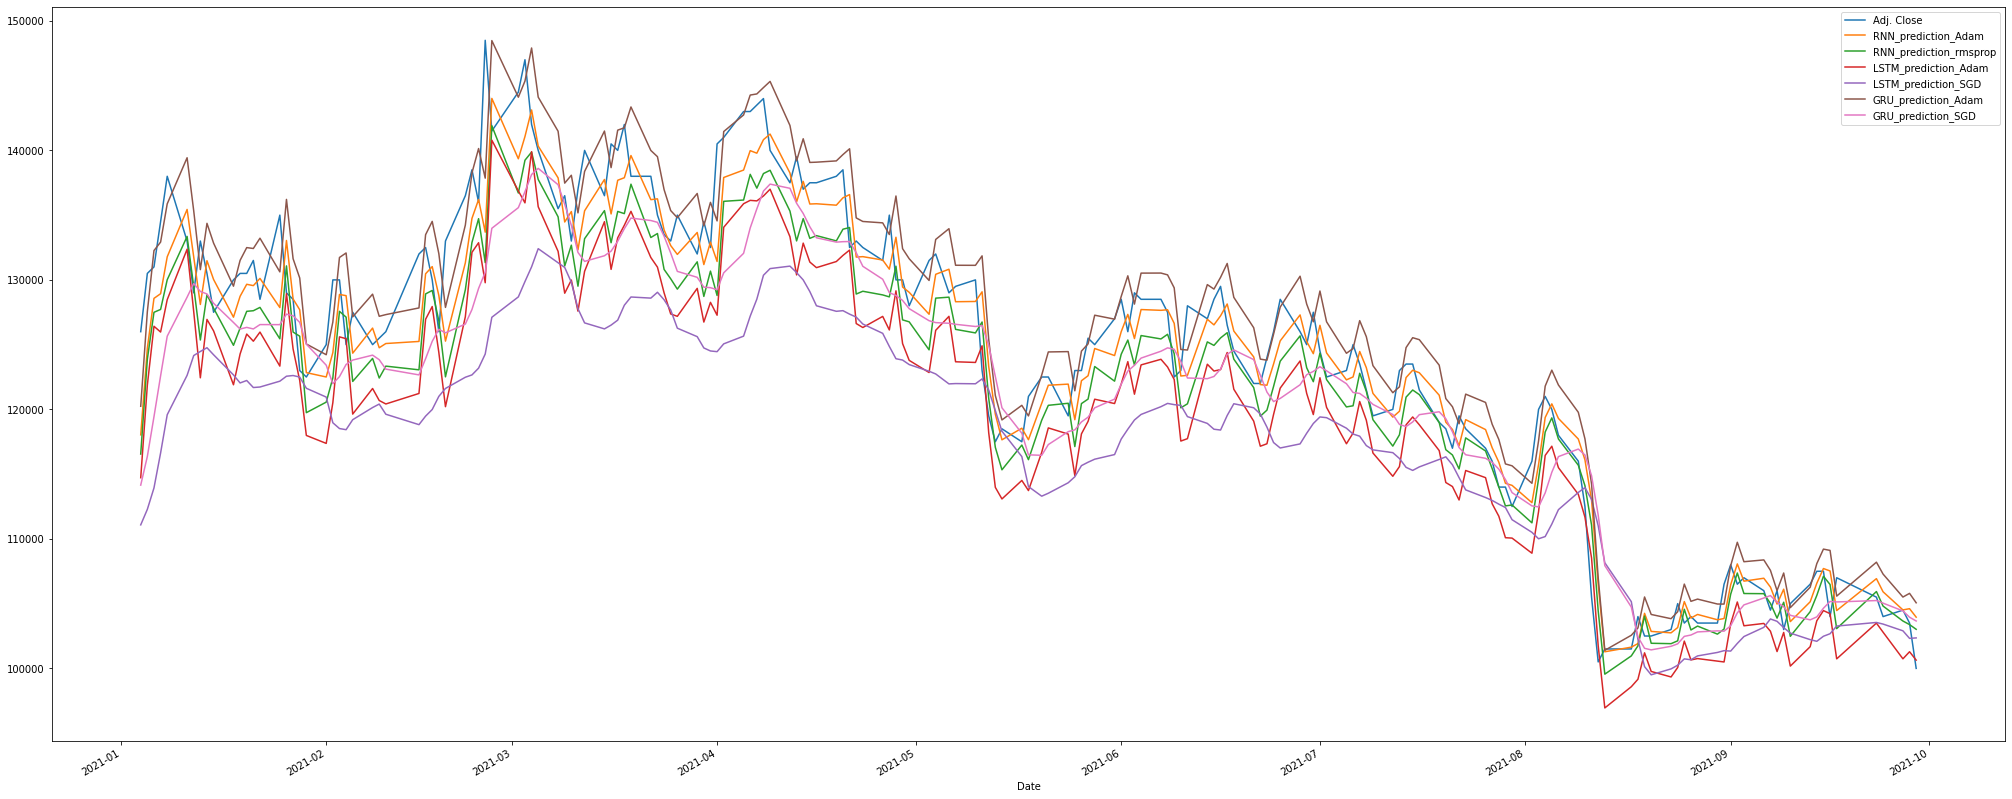

In [ ]:
def actual_pred_plot(preds):
    """
    actual vs RNN, LSTM, GRU predition
    """
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'RNN_prediction_Adam'])
    actual_pred['Adj. Close'] = all_data.loc['2021':,'Adj Close'][0:len(preds)]
    actual_pred['RNN_prediction_Adam'] = rnn_predictions_Adam[:,0]
    actual_pred['RNN_prediction_rmsprop'] = rnn_predictions_rmsprop[:,0]
    actual_pred['LSTM_prediction_Adam'] = LSTM_prediction_Adam[:,0]
    actual_pred['LSTM_prediction_SGD'] = LSTM_prediction_SGD[:,0]
    actual_pred['GRU_prediction_Adam'] = GRU_prediction_Adam[:,0]
    actual_pred['GRU_prediction_SGD'] = GRU_prediction_SGD[:,0]
    
    RNN_Adam_pre = 0
    RNN_rmsprop_pre = 0
    LSTM_Adam_pre = 0
    LSTM_SGD_pre = 0
    GRU_Adam_pre = 0
    GRU_SGD_pre = 0

    RNN_Adam_diff = 0
    RNN_rmsprop_diff = 0
    LSTM_Adam_diff = 0
    LSTM_SGD_diff = 0
    GRU_Adam_diff = 0
    GRU_SGD_diff = 0

# 실제값과 예측값의 평균계산
    for i in range(len(actual_pred['Adj. Close'])):
        RNN_Adam_pre += actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_Adam'][i]
        RNN_rmsprop_pre += actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_rmsprop'][i]
        LSTM_Adam_pre += actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_Adam'][i]
        LSTM_SGD_pre += actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_SGD'][i]
        GRU_Adam_pre += actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_Adam'][i]
        GRU_SGD_pre += actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_SGD'][i]
    
    RNN_Adam_pre /= len(actual_pred['Adj. Close'])
    RNN_rmsprop_pre /= len(actual_pred['Adj. Close'])
    LSTM_Adam_pre /= len(actual_pred['Adj. Close'])
    LSTM_SGD_pre /= len(actual_pred['Adj. Close'])
    GRU_Adam_pre /= len(actual_pred['Adj. Close'])
    GRU_SGD_pre /= len(actual_pred['Adj. Close'])

# 평균 계산후 평균을 빼서 동일한 조건으로 만듦
    for i in range(len(actual_pred['Adj. Close'])):
        RNN_Adam_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_Adam'][i] - RNN_Adam_pre)
        RNN_rmsprop_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_rmsprop'][i] - RNN_rmsprop_pre)
        LSTM_Adam_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_Adam'][i] - LSTM_Adam_pre)
        LSTM_SGD_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_SGD'][i] - LSTM_SGD_pre)
        GRU_Adam_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_Adam'][i] - GRU_Adam_pre)
        GRU_SGD_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_SGD'][i] - GRU_SGD_pre)

    print(RNN_Adam_diff)
    print(RNN_rmsprop_diff)
    print(LSTM_Adam_diff)
    print(LSTM_SGD_diff)
    print(GRU_Adam_diff)
    print(GRU_SGD_diff)

    from tensorflow.keras.metrics import MeanSquaredError 
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']), np.array(actual_pred['RNN_prediction_Adam']))
    
    return (m.result().numpy(), actual_pred.plot())

from pylab import rcParams
from pylab import legend
rcParams['figure.figsize'] = 35,15
X_train, y_train, X_test, sc = ts_train_test_normalize(all_data, 5,2)
my_rnn_model_Adam, rnn_predictions_Adam = simple_rnn_model_Adam(X_train, y_train, X_test, sc)
my_rnn_model_rmsprop, rnn_predictions_rmsprop = simple_rnn_model_rmsprop(X_train, y_train, X_test, sc)
my_LSTM_model_Adam, LSTM_prediction_Adam = LSTM_model_regularization_Adam(X_train, y_train, X_test, sc)
my_LSTM_model_SGD, LSTM_prediction_SGD = LSTM_model_regularization_SGD(X_train, y_train, X_test, sc)
my_GRU_model_Adam, GRU_prediction_Adam = GRU_model_Adam(X_train, y_train, X_test, sc)
my_GRU_model_SGD, GRU_prediction_SGD = GRU_model_SGD(X_train, y_train, X_test, sc)

actual_pred_plot(rnn_predictions_Adam)

## RNN LSTM GRU 시각화 & 예측값 입력
## 실제값 + 제일 성능이좋은 예측모델 출력



In [141]:
def actual_pred_plot(preds):
    """
    actual vs RNN, LSTM, GRU predition
    """
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'RNN_prediction_Adam'])
    actual_pred['Adj. Close'] = all_data.loc['2021':,'Adj Close'][0:len(preds)]
    actual_pred['RNN_prediction_Adam'] = rnn_predictions_Adam[:,0]
    actual_pred['RNN_prediction_rmsprop'] = rnn_predictions_rmsprop[:,0]
    actual_pred['LSTM_prediction_Adam'] = LSTM_prediction_Adam[:,0]
    actual_pred['LSTM_prediction_SGD'] = LSTM_prediction_SGD[:,0]
    actual_pred['GRU_prediction_Adam'] = GRU_prediction_Adam[:,0]
    actual_pred['GRU_prediction_SGD'] = GRU_prediction_SGD[:,0]
    
    RNN_Adam_pre = 0
    RNN_rmsprop_pre = 0
    LSTM_Adam_pre = 0
    LSTM_SGD_pre = 0
    GRU_Adam_pre = 0
    GRU_SGD_pre = 0

    RNN_Adam_diff = 0
    RNN_rmsprop_diff = 0
    LSTM_Adam_diff = 0
    LSTM_SGD_diff = 0
    GRU_Adam_diff = 0
    GRU_SGD_diff = 0

    #실제값과 예측값의 평균계산
    for i in range(len(actual_pred['Adj. Close'])):
        RNN_Adam_pre += actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_Adam'][i]
        RNN_rmsprop_pre += actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_rmsprop'][i]
        LSTM_Adam_pre += actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_Adam'][i]
        LSTM_SGD_pre += actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_SGD'][i]
        GRU_Adam_pre += actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_Adam'][i]
        GRU_SGD_pre += actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_SGD'][i]
    
    RNN_Adam_pre /= len(actual_pred['Adj. Close'])
    RNN_rmsprop_pre /= len(actual_pred['Adj. Close'])
    LSTM_Adam_pre /= len(actual_pred['Adj. Close'])
    LSTM_SGD_pre /= len(actual_pred['Adj. Close'])
    GRU_Adam_pre /= len(actual_pred['Adj. Close'])
    GRU_SGD_pre /= len(actual_pred['Adj. Close'])

    #평균 계산후 평균을 빼서 동일한 조건으로 만듦
    for i in range(len(actual_pred['Adj. Close'])):
        RNN_Adam_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_Adam'][i] - RNN_Adam_pre)
        RNN_rmsprop_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['RNN_prediction_rmsprop'][i] - RNN_rmsprop_pre)
        LSTM_Adam_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_Adam'][i] - LSTM_Adam_pre)
        LSTM_SGD_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['LSTM_prediction_SGD'][i] - LSTM_SGD_pre)
        GRU_Adam_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_Adam'][i] - GRU_Adam_pre)
        GRU_SGD_diff += abs(actual_pred['Adj. Close'][i] - actual_pred['GRU_prediction_SGD'][i] - GRU_SGD_pre)
    
    #실제값과 예측값의 차이가 제일 적은 모델 반환
    priority = min(RNN_Adam_diff, RNN_rmsprop_diff, LSTM_Adam_diff, LSTM_SGD_diff, GRU_Adam_diff, GRU_SGD_diff)

    if priority == RNN_Adam_diff:
        actual_pred = actual_pred.drop(['RNN_prediction_rmsprop', 'LSTM_prediction_Adam', 'LSTM_prediction_SGD', 'GRU_prediction_Adam', 'GRU_prediction_SGD'], axis='columns')

    elif priority == RNN_rmsprop_diff:
        actual_pred = actual_pred.drop(['RNN_prediction_Adam', 'LSTM_prediction_Adam', 'LSTM_prediction_SGD', 'GRU_prediction_Adam', 'GRU_prediction_SGD'], axis='columns')

    elif priority == LSTM_Adam_diff:
        actual_pred = actual_pred.drop(['RNN_prediction_Adam', 'RNN_prediction_rmsprop', 'LSTM_prediction_SGD', 'GRU_prediction_Adam', 'GRU_prediction_SGD'], axis='columns')

    elif priority == LSTM_SGD_diff:
        actual_pred = actual_pred.drop(['RNN_prediction_Adam', 'RNN_prediction_rmsprop', 'LSTM_prediction_Adam', 'GRU_prediction_Adam', 'GRU_prediction_SGD'], axis='columns')

    elif priority == GRU_Adam_diff:
        actual_pred = actual_pred.drop(['RNN_prediction_Adam', 'RNN_prediction_rmsprop', 'LSTM_prediction_Adam', 'LSTM_prediction_SGD', 'GRU_prediction_SGD'], axis='columns')

    elif priority == GRU_SGD_diff:
        actual_pred = actual_pred.drop(['RNN_prediction_Adam', 'RNN_prediction_rmsprop', 'LSTM_prediction_Adam', 'LSTM_prediction_SGD', 'GRU_prediction_Adam'], axis='columns')
    
    return actual_pred

from pylab import rcParams
from pylab import legend
rcParams['figure.figsize'] = 35,15
X_train, y_train, X_test, sc = ts_train_test_normalize(all_data, 5,2)
my_rnn_model_Adam, rnn_predictions_Adam = simple_rnn_model_Adam(X_train, y_train, X_test, sc)
my_rnn_model_rmsprop, rnn_predictions_rmsprop = simple_rnn_model_rmsprop(X_train, y_train, X_test, sc)
my_LSTM_model_Adam, LSTM_prediction_Adam = LSTM_model_regularization_Adam(X_train, y_train, X_test, sc)
my_LSTM_model_SGD, LSTM_prediction_SGD = LSTM_model_regularization_SGD(X_train, y_train, X_test, sc)
my_GRU_model_Adam, GRU_prediction_Adam = GRU_model_Adam(X_train, y_train, X_test, sc)
my_GRU_model_SGD, GRU_prediction_SGD = GRU_model_SGD(X_train, y_train, X_test, sc)

actual_pred = []
actual_pred = actual_pred_plot(rnn_predictions_Adam)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


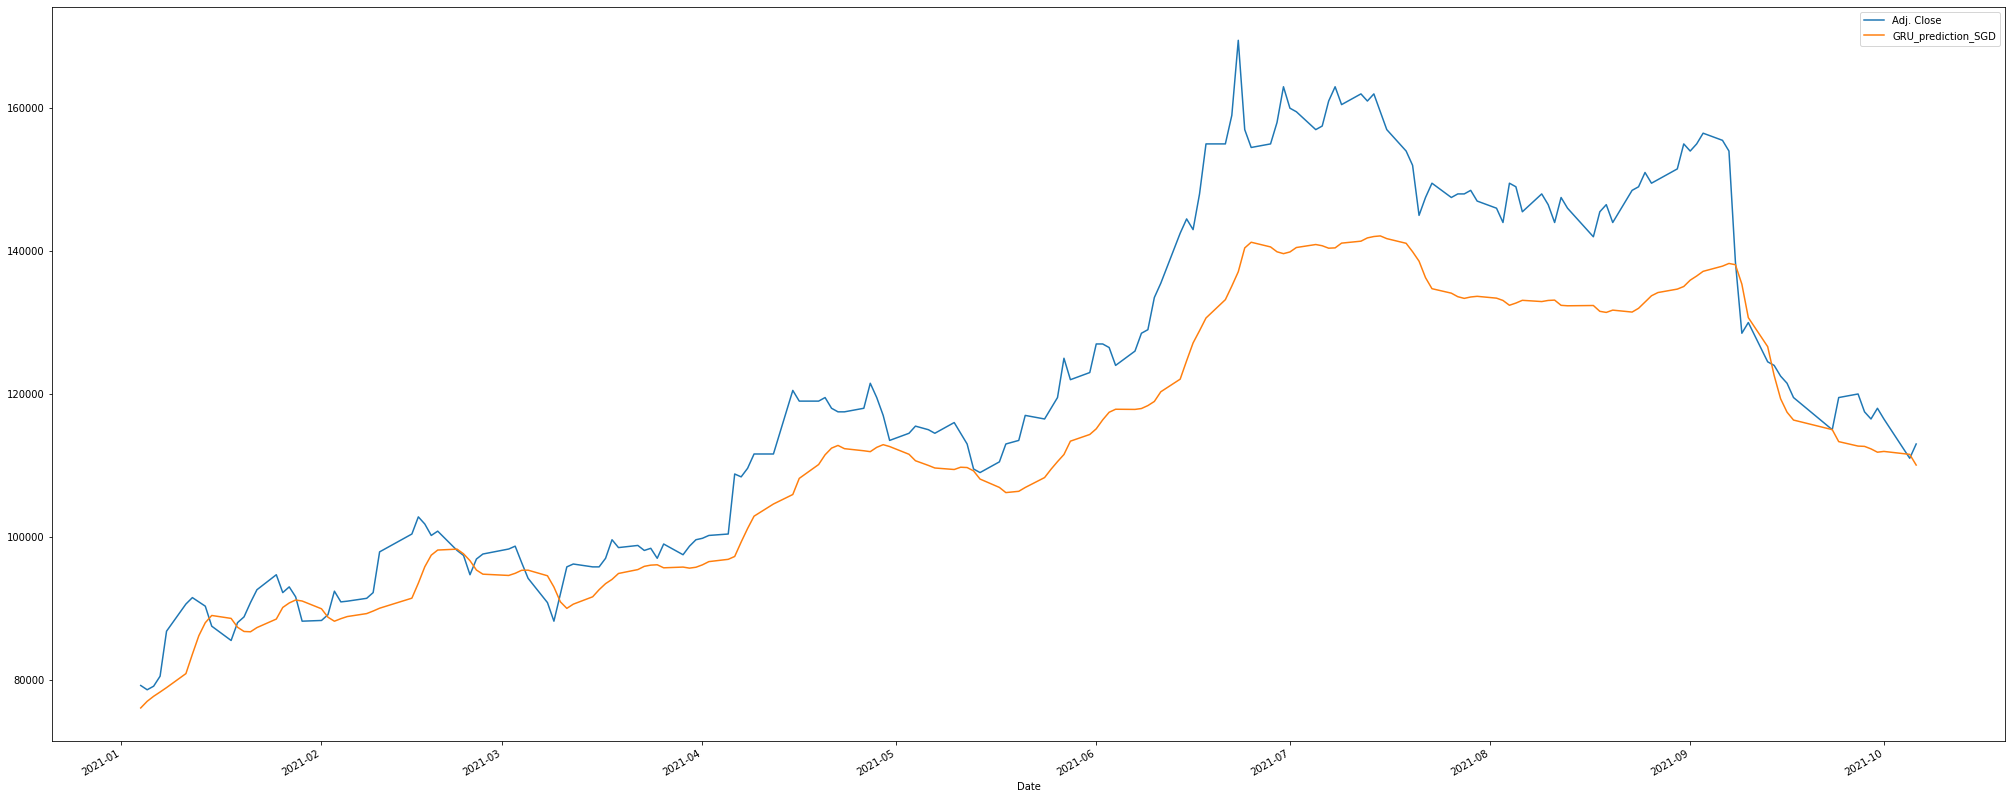

In [142]:
actual_pred.plot()

##최적 모델의 이름을 가져와서 수익률이 제일 높은 최저가, 최고가, 예측 수익률, 실제 수익률 반환




In [143]:
from datetime import datetime
p_model = 0
p_model = actual_pred.columns[1]
actual_pred.index = actual_pred.index.strftime('%Y-%m-%d')
actual_pred[p_model]

Date
2021-01-04     76056.304688
2021-01-05     76987.523438
2021-01-06     77687.382812
2021-01-07     78285.726562
2021-01-08     78903.726562
                  ...      
2021-09-29    112316.742188
2021-09-30    111850.437500
2021-10-01    111959.906250
2021-10-05    111547.390625
2021-10-06    110051.570312
Name: GRU_prediction_SGD, Length: 186, dtype: float32

In [154]:
buy_model =  []
sell_model = []
diff_value = []
buy_price = []
sell_price = []
real_buy_price = []
real_sell_price = []

for i in range(len(actual_pred[p_model])):
    for j in range(len(actual_pred[p_model])):
        if i <= j and actual_pred[p_model][i] <= actual_pred[p_model][j]:
            buy_model.append(actual_pred.index[i])
            buy_price.append(actual_pred[p_model][i])
            real_buy_price.append(actual_pred['Adj. Close'][i])
            sell_model.append(actual_pred.index[j])
            sell_price.append(actual_pred[p_model][j])
            real_sell_price.append(actual_pred['Adj. Close'][j])
            diff_value.append(actual_pred[p_model][j] - actual_pred[p_model][i])

In [155]:
#len(buy_model)
#len(sell_model)
# diff_value
# actual_pred
rf = diff_value.index(max(diff_value))
rf

131

In [ ]:
print(str(buy_model[rf]) + " 예측값: " + str(buy_price[rf]) + " 실제값: " + str(real_buy_price[rf]))
print(str(sell_model[rf]) + " 예측값: " + str(sell_price[rf]) + " 실제값: " + str(real_sell_price[rf]))
print("예측 수익률: " + str(round(diff_value[rf]/sell_price[rf]*100,2)) + "%")
print("실제 수익률: " + str(round((real_sell_price[rf]-real_buy_price[rf])/real_buy_price[rf]*100,2))+ "%")